# MNIST from scratch with numpy

In [1]:
# load changed modules automatically
%reload_ext autoreload
%autoreload 2

In [3]:
# load numpy
import numpy as np

# load dataloaders and required layers
from mnist import dataloader
from mnist.networks import NeuralNet
from mnist.optimizers import SGD
from mnist.layers import Softmax, Linear, Dropout, ReLU
from mnist.losses import CrossEntropy
from mnist.models import TwoLayerModel

# load pyplot for displaying images
from matplotlib import pyplot as plt

# show images inline on notebook
%matplotlib inline

# debugging
import pdb

## Start building the model

In [4]:
# Create the model
model = TwoLayerModel(n_input=28*28, n_hidden1=256, n_hidden2=64, n_output=10)
net = NeuralNet(model=model)

In [5]:
learner = SGD(net=net, dataloader=dataloader.DataLoader(), batch_size=256)

In [6]:
learner.fit(n_epochs=10, learning_rate=1e-1)

Epoch Train loss   Valid loss   Train acc Valid acc
0     0.2389670777 0.2022058004 0.9250000 0.9420000
1     0.1682843378 0.1528287979 0.9500000 0.9560000
2     0.1145486435 0.1297776242 0.9750000 0.9627000
3     0.0717171049 0.1177104595 0.9875000 0.9654000
4     0.0729476743 0.1073338352 0.9750000 0.9684000
5     0.0521168622 0.1030080239 1.0000000 0.9701000
6     0.0731059186 0.0986666544 0.9875000 0.9702000
7     0.0438781890 0.0943670658 1.0000000 0.9723000
8     0.0789558323 0.0900981623 0.9750000 0.9727000
9     0.0575919544 0.0886197585 0.9875000 0.9738000


## Check results

In [7]:
def show(img):
    plt.imshow(img, cmap="gray")

In [8]:
# load data for checking results
dl = dataloader.DataLoader()
((x_train, y_train), (x_valid, y_valid), _) = dl.load_data()

In [9]:
# get some random examples from validation data,
# compare predictions with actual values
net.train = False
valid_preds = net.forward(x_valid)
random_idxs = np.random.randint(0, len(x_valid), 10)
np.argmax(valid_preds, axis=1)[random_idxs], y_valid[random_idxs]

(array([7, 5, 2, 7, 2, 3, 9, 9, 7, 2]), array([7, 5, 2, 7, 2, 3, 9, 9, 7, 2]))

prediction: 2 correct: 2


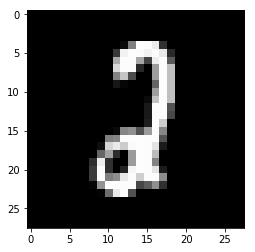

In [10]:
# display a random image from validation data with
# prediction and correct value
valid_images = np.reshape(x_valid, (-1,28,28))
valid_preds = net.forward(x_valid)
random_idx = np.random.randint(0, len(x_valid))
prediction = np.argmax(valid_preds, axis=1)[random_idx]
correct = y_valid[random_idx]
print("prediction:", prediction, "correct:", correct)
show(valid_images[random_idx])

In [12]:
# whole validation set accuracy
net.train = False
valid_preds = net.forward(x_valid)
valid_accuracy = np.mean(valid_preds.argmax(axis=1) == y_valid)
valid_accuracy

0.914